## One Sample T Test

Analyze if college students get 7.2 hours of sleep, on average, based on a sample of students:

In [1]:
import pandas as pd
import scipy.stats as stats
import math
df = pd.read_csv("students.csv")

In [2]:
df.head()

,ID,Gender,Classification,Height,Shoe Size,Phone Time,# of Shoes,Birth order,Pets,Happy,...,Exercise,Stat Pre,Stat Post,Phone Type,Sleep,Social Media,Impact of SocNetworking,Political,Animal,Superhero
0,1,male,senior,67.75,7.0,12.0,12.0,youngest,5.0,0.80,...,360,3.0,NaN,iPhone,7.0,180.0,worse,Democrat,Dog person,Batman
1,2,male,freshman,71.00,7.5,1.5,5.0,middle,4.0,0.75,...,200,9.0,NaN,Android smartphone,7.0,20.0,better,Democrat,Dog person,Batman
2,3,female,freshman,64.00,6.0,25.0,15.0,oldest,8.0,0.90,...,30,7.0,5.0,Android smartphone,8.0,60.0,better,Republican,Dog person,Batman
3,4,female,freshman,63.00,6.5,30.0,30.0,middle,12.0,0.98,...,180,6.0,7.0,iPhone,6.0,60.0,better,Republican,Both,Superman
4,5,male,senior,69.00,6.5,23.0,8.0,oldest,4.0,0.75,...,180,4.0,7.0,iPhone,5.5,60.0,worse,Independent,Dog person,Superman


In [3]:
onesample = stats.ttest_1samp(df['Sleep'], 7.2)

In [4]:
print(f'p-value for two sided test: {onesample.pvalue:.4f}')

p-value for two sided test: 0.0580


The principal of the school thinks that the average hours of sleep is at least 7.

In [5]:
print(f'p-value for one sided test: {onesample.pvalue / 2:.4f}')

p-value for one sided test: 0.0290


In [6]:
import numpy as np
np.mean(df['Sleep'])

6.8618421052631575

## Tests on the Difference in Means of Two Normal Distributions, Variances Unknown and Equal

In [7]:
import pandas as pd
import scipy.stats as stats
import math
df = pd.read_csv("catalysts.csv")

In [8]:
xbar1 = df['Catalyst1'].mean()
xbar2 = df['Catalyst2'].mean()
s1 = df['Catalyst1'].std()
s2 = df['Catalyst2'].std()

print ('xbar1 = {:.3f}'.format(xbar1))
print ('xbar2 = {:.3f}'.format(xbar2))
print ('s1 = {:.3f}'.format(s1))
print ('s2 = {:.3f}'.format(s2))

xbar1 = 92.255
xbar2 = 92.732
s1 = 2.385
s2 = 2.983


In [9]:
s_pooled = math.sqrt(((len(df['Catalyst1']) - 1) * (s1 ** 2) + (len(df['Catalyst2']) - 1) * (s2 ** 2)) / (len(df['Catalyst1']) - 1 + len(df['Catalyst2']) - 1))

print ('s_pooled = {:.3f}'.format(s_pooled))

s_pooled = 2.701


In [10]:
SE = s_pooled*math.sqrt(1/len(df['Catalyst1']) + 1/len(df['Catalyst2']))

print ('standard error = {:.3f}'.format(SE))

standard error = 1.350


In [11]:
t_statistic = (xbar1-xbar2)/SE

print ('t_statistic = {:.3f}'.format(t_statistic))

t_statistic = -0.354


In [12]:
p_value = 2*stats.t.cdf(-0.35, 14)

print ('p_value = {:.3f}'.format(p_value))

p_value = 0.732


In [13]:
alpha = 0.05

if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of Ha.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.05 level of significance, we fail to reject the null hypothesis.


In [14]:
res = stats.ttest_ind(df['Catalyst1'], df['Catalyst2'], equal_var=True)

print(f't statistic for two sided test: {res.statistic:.4f}')
print(f'p-value for two sided test: {res.pvalue:.4f}')

t statistic for two sided test: -0.3536
p-value for two sided test: 0.7289


### Arsenic in Drinking Water

In [27]:
import pandas as pd
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
df = pd.read_csv("arsenic.csv")

In [25]:
df['x1'].mean()

12.5

In [26]:
df['x2'].mean()

27.5

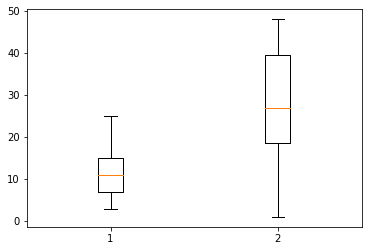

In [32]:
data = [df['x1'], df['x2']]

# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.boxplot(data)

plt.show()

In [21]:
ind_sample = stats.ttest_ind(df['x1'], df['x2'], equal_var=True)

In [23]:
print(f't statistic for two sided test: {ind_sample.statistic:.4f}')
print(f'p-value for two sided test: {ind_sample.pvalue:.4f}')

t statistic for two sided test: -2.7669
p-value for two sided test: 0.0127


In [24]:
alpha = 0.05

if ind_sample.pvalue<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of Ha.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.05 level of significance, we can reject the null hypothesis in favor of Ha.
